In [131]:
import geopandas as gpd
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

In [11]:
gdf = gpd.read_file(r"C:\Users\abirf\OneDrive\Desktop\LAD_Dec_2021_England.geojson")

In [13]:
gdf['lon'] = gdf.geometry.centroid.x
gdf['lat'] = gdf.geometry.centroid.y

C:\Users\abirf\AppData\Local\Temp\ipykernel_18400\3730381962.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf['lon'] = gdf.geometry.centroid.x
C:\Users\abirf\AppData\Local\Temp\ipykernel_18400\3730381962.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf['lat'] = gdf.geometry.centroid.y


In [15]:
gdf['lon']

0     -1.259385
1     -1.222253
2     -1.020841
3     -1.332370
4     -1.552892
         ...   
304   -0.177506
305   -0.035612
306   -0.012739
307   -0.186625
308   -0.161409
Name: lon, Length: 309, dtype: float64

In [17]:
gdf['lat']

0      54.669437
1      54.542060
2      54.551687
3      54.561512
4      54.548726
         ...    
304    51.362134
305    51.517234
306    51.594097
307    51.451358
308    51.513829
Name: lat, Length: 309, dtype: float64

In [23]:
file_path = r"C:\Users\abirf\OneDrive\Desktop\privaterentalmarketstatistics231220.xls"

In [25]:
df = pd.read_excel(file_path, sheet_name="Table2.3", skiprows=6)

In [27]:
df = df.iloc[1:357].reset_index(drop=True)

In [29]:
df_clean = df.drop(columns=['Unnamed: 0'], errors='ignore')

In [31]:
df_clean = df_clean.rename(columns={"Area Code1": "Area Code", "LA Code1": "LA Code"})

In [33]:
df_clean = df_clean[df_clean["LA Code"].notna()].reset_index(drop=True)

In [35]:
df_clean.isna().sum()

LA Code           0
Area Code         0
Area              0
Count of rents    0
Mean              0
Lower quartile    0
Median            0
Upper quartile    0
dtype: int64

In [37]:
df_sorted = df_clean.sort_values("Mean", ascending=False)

In [39]:
df_clean.head()

,LA Code,Area Code,Area,Count of rents,Mean,Lower quartile,Median,Upper quartile
0,1355.0,E06000047,County Durham UA,260.0,421.0,338,380.0,450
1,1350.0,E06000005,Darlington UA,270.0,416.0,350,400.0,475
2,724.0,E06000001,Hartlepool UA,90.0,411.0,395,425.0,440
3,734.0,E06000002,Middlesbrough UA,80.0,469.0,425,450.0,500
4,2935.0,E06000057,Northumberland UA,150.0,434.0,375,425.0,478


In [41]:
df_merged = df_clean.merge(gdf[['LAD21CD', 'lon', 'lat']], left_on='Area Code', right_on='LAD21CD', how='left')

In [43]:
df_merged

,LA Code,Area Code,Area,Count of rents,Mean,Lower quartile,Median,Upper quartile,LAD21CD,lon,lat
0,1355.0,E06000047,County Durham UA,260.0,421.0,338,380.0,450,E06000047,-1.839795,54.695398
1,1350.0,E06000005,Darlington UA,270.0,416.0,350,400.0,475,E06000005,-1.552892,54.548726
2,724.0,E06000001,Hartlepool UA,90.0,411.0,395,425.0,440,E06000001,-1.259385,54.669437
3,734.0,E06000002,Middlesbrough UA,80.0,469.0,425,450.0,500,E06000002,-1.222253,54.542060
4,2935.0,E06000057,Northumberland UA,150.0,434.0,375,425.0,478,E06000057,-2.068187,55.239563
...,...,...,...,...,...,...,...,...,...,...,...
308,1630.0,E07000083,Tewkesbury,100.0,620.0,540,600.0,695,E07000083,-2.087065,51.945724
309,3305.0,E07000187,Mendip,180.0,650.0,595,650.0,700,E07000187,-2.544507,51.202902
310,3310.0,E07000188,Sedgemoor,110.0,596.0,520,593.0,630,E07000188,-2.946453,51.179913
311,3330.0,E07000246,Somerset West and Taunton,180.0,638.0,575,635.0,700,E07000246,-3.365041,51.084733


In [45]:
df_merged.isna().sum()

LA Code           0
Area Code         0
Area              0
Count of rents    0
Mean              0
Lower quartile    0
Median            0
Upper quartile    0
LAD21CD           7
lon               7
lat               7
dtype: int64

In [47]:
df_merged = df_merged.dropna(subset=['lon', 'lat']).reset_index(drop=True)

In [49]:
df_merged.isna().sum()

LA Code           0
Area Code         0
Area              0
Count of rents    0
Mean              0
Lower quartile    0
Median            0
Upper quartile    0
LAD21CD           0
lon               0
lat               0
dtype: int64

In [53]:
df_merged[df_merged['Area'].str.contains("London", case=False, na=False)]

,LA Code,Area Code,Area,Count of rents,Mean,Lower quartile,Median,Upper quartile,LAD21CD,lon,lat
181,5030.0,E09000001,City of London,60.0,2137.0,1750,2058.0,2492,E09000001,-0.092009,51.51469


In [55]:
!pip install haversine

In [57]:
from haversine import haversine

In [59]:
london_coord = (51.51469, -0.092009)

In [61]:
df_merged['distance_to_london_km'] = df_merged.apply(
    lambda row: haversine((row['lat'], row['lon']), london_coord), axis = 1
)

In [63]:
df_merged

,LA Code,Area Code,Area,Count of rents,Mean,Lower quartile,Median,Upper quartile,LAD21CD,lon,lat,distance_to_london_km
0,1355.0,E06000047,County Durham UA,260.0,421.0,338,380.0,450,E06000047,-1.839795,54.695398,372.396530
1,1350.0,E06000005,Darlington UA,270.0,416.0,350,400.0,475,E06000005,-1.552892,54.548726,351.208150
2,724.0,E06000001,Hartlepool UA,90.0,411.0,395,425.0,440,E06000001,-1.259385,54.669437,359.335562
3,734.0,E06000002,Middlesbrough UA,80.0,469.0,425,450.0,500,E06000002,-1.222253,54.542060,344.997719
4,2935.0,E06000057,Northumberland UA,150.0,434.0,375,425.0,478,E06000057,-2.068187,55.239563,434.390054
...,...,...,...,...,...,...,...,...,...,...,...,...
301,1630.0,E07000083,Tewkesbury,100.0,620.0,540,600.0,695,E07000083,-2.087065,51.945724,145.513979
302,3305.0,E07000187,Mendip,180.0,650.0,595,650.0,700,E07000187,-2.544507,51.202902,173.773162
303,3310.0,E07000188,Sedgemoor,110.0,596.0,520,593.0,630,E07000188,-2.946453,51.179913,201.698378
304,3330.0,E07000246,Somerset West and Taunton,180.0,638.0,575,635.0,700,E07000246,-3.365041,51.084733,232.502097


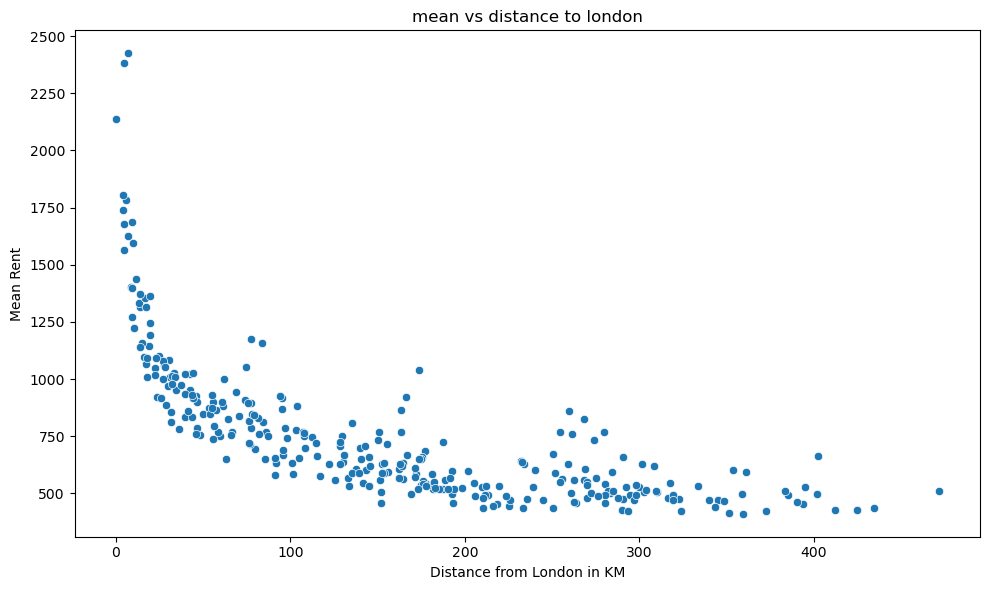

In [71]:
plt.figure(figsize=(10,6))
sns.scatterplot(data = df_merged, x = 'distance_to_london_km' , y = 'Mean')
plt.title('mean vs distance to london')
plt.xlabel('Distance from London in KM')
plt.ylabel('Mean Rent')
plt.tight_layout()
plt.show()

In [97]:
X = df_merged[['distance_to_london_km']]
Y = df_merged[['Mean']]

In [99]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [101]:
x_train

,distance_to_london_km
213,46.409018
244,101.554782
75,133.106907
179,97.988215
59,339.743458
...,...
188,8.933073
71,254.723759
106,219.371865
270,81.872605


In [103]:
y_train

,Mean
213,899.0
244,585.0
75,568.0
179,742.0
59,471.0
...,...
188,1270.0
71,549.0
106,534.0
270,759.0


In [121]:
poly = PolynomialFeatures(degree = 3)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)

In [123]:
model = LinearRegression()
model.fit(x_train_poly, y_train)

LinearRegression()

In [133]:
y_pred = model.predict(x_test_poly)

C:\Users\abirf\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


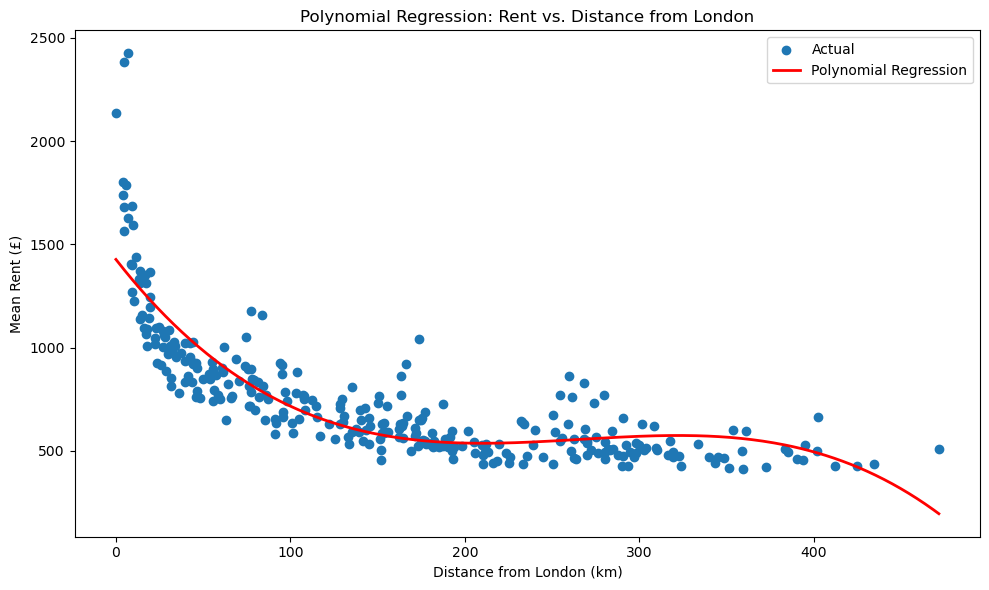

In [135]:
x_range = np.linspace(X.min(), X.max(), 300)
x_range_poly = poly.transform(x_range)

y_range_pred = model.predict(x_range_poly)

plt.figure(figsize=(10, 6))
plt.scatter(X, Y, label='Actual')

plt.plot(x_range, y_range_pred, color='red', linewidth=2, label='Polynomial Regression')

plt.xlabel("Distance from London (km)")
plt.ylabel("Mean Rent (£)")
plt.title("Polynomial Regression: Rent vs. Distance from London")
plt.legend()
plt.tight_layout()
plt.show()

In [137]:
y_train_pred = model.predict(x_train_poly)
y_test_pred = model.predict(x_test_poly)

In [139]:
train_score = r2_score(y_train, y_train_pred)
test_score = r2_score(y_test, y_test_pred)

In [141]:
train_score

0.7588953674439034

In [143]:
test_score

0.7126617175018446